In [140]:
from qiskit import QuantumCircuit 
from qiskit.circuit.library import MCXGate, XGate
from qiskit.circuit.library import  RYGate, RXGate, RZGate
mcry= MCXGate

In [175]:
# Demonstration of one-to-one case #
n = 4
qc =QuantumCircuit(2*n ,n)

for i in range(n):
    qc.h(i)
# qc.barrier()
qc.barrier()

######## building a one-to-one f(x) function ########
control = 0
state = 0
for i in range(n):
    qc.mcx([i for i in range(n)], n+control, ctrl_state=state)
    control +=1 
    state += 1

control = 0
for i in range(n-1):
    qc.mcx([i for i in range(n)], n+control, ctrl_state=state)
    qc.mcx([i for i in range(n)], n+control+1, ctrl_state=state)
    control +=1 
    state += 1

qc.mcx([i for i in range(n)], n+(n-1), ctrl_state=state)
qc.mcx([i for i in range(n)], n, ctrl_state=state)
state += 1

qc.mcx([i for i in range(n)], n+0, ctrl_state=state)
qc.mcx([i for i in range(n)], n+2, ctrl_state=state)
state += 1 

qc.mcx([i for i in range(n)], n+1, ctrl_state=state)
qc.mcx([i for i in range(n)], n+3, ctrl_state=state)
state += 1 

qc.mcx([i for i in range(n)], n+0, ctrl_state=state)
qc.mcx([i for i in range(n)], n+1, ctrl_state=state)
qc.mcx([i for i in range(n)], n+2, ctrl_state=state)
state += 1 

qc.mcx([i for i in range(n)], n+1, ctrl_state=state)
qc.mcx([i for i in range(n)], n+2, ctrl_state=state)
qc.mcx([i for i in range(n)], n+3, ctrl_state=state)
state += 1 

qc.mcx([i for i in range(n)], n+0, ctrl_state=state)
qc.mcx([i for i in range(n)], n+2, ctrl_state=state)
qc.mcx([i for i in range(n)], n+3, ctrl_state=state)
state += 1 


qc.mcx([i for i in range(n)], n+0, ctrl_state=state)
qc.mcx([i for i in range(n)], n+1, ctrl_state=state)
qc.mcx([i for i in range(n)], n+3, ctrl_state=state)
state += 1 

qc.mcx([i for i in range(n)], n+0, ctrl_state=state)
qc.mcx([i for i in range(n)], n+1, ctrl_state=state)
qc.mcx([i for i in range(n)], n+2, ctrl_state=state)
qc.mcx([i for i in range(n)], n+3, ctrl_state=state)
state += 1 

qc.mcx([i for i in range(n)], n+0, ctrl_state=state)
qc.mcx([i for i in range(n)], n+1, ctrl_state=state)
qc.mcx([i for i in range(n)], n+2, ctrl_state=state)
qc.mcx([i for i in range(n)], n+3, ctrl_state=state)
qc.mcx([i for i in range(n)], n+0, ctrl_state=state)
qc.mcx([i for i in range(n)], n+1, ctrl_state=state)
qc.mcx([i for i in range(n)], n+2, ctrl_state=state)
qc.mcx([i for i in range(n)], n+3, ctrl_state=state)
print(state)
######## building a one-to-one f(x) function ########
qc.barrier()
for i in range(n):
    qc.h(i)
for i in range(n):
    qc.measure(i,i)



15


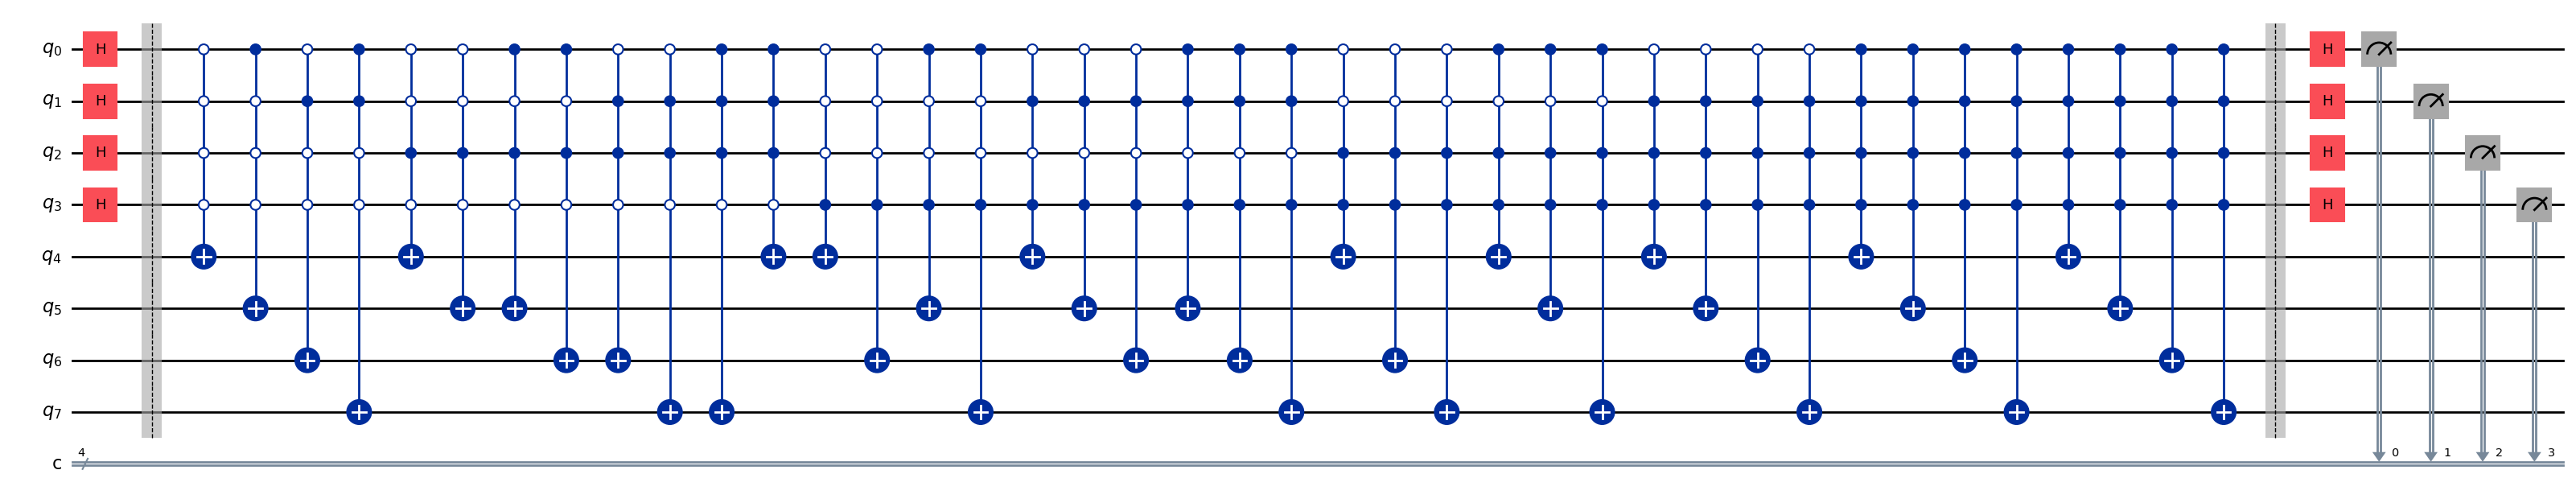

In [176]:
qc.draw('mpl', fold=-1)

In [177]:
# shot-based measurement # 
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler
import numpy as np
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=3)
isa_qc = pm.run(qc)

shots = 100000
with Session(backend=aer_sim) as session:
    sampler = Sampler(aer_sim)
    result = sampler.run([isa_qc], shots= shots).result()
expval = []
counts = result[0].data.c.get_counts()

for key in counts.keys():
    print(key, counts[key]/shots)
    if np.abs(np.round(counts[key]/shots,3) - 1/(2**(n))) < (1/(2**(n)))*0.1:
        print('f(x) is a one-to-one function')
    elif np.abs(np.round(counts[key]/shots,3) - 1/(2**(n-1))) < (1/(2**(n-1)))*0.1: 
        print('f(x) is a two-to-one function')


base_primitive._run:WARNING:2025-11-19 01:54:54,289: Even though a session/batch context manager is open this job will run in job mode because the sampler primitive was initialized outside the context manager. Move the sampler initialization inside the context manager to run in a session/batch.


0110 0.06169
f(x) is a one-to-one function
0100 0.06279
f(x) is a one-to-one function
1101 0.06356
f(x) is a one-to-one function
0111 0.06178
f(x) is a one-to-one function
1011 0.06289
f(x) is a one-to-one function
1001 0.06174
f(x) is a one-to-one function
0010 0.06259
f(x) is a one-to-one function
1100 0.06164
f(x) is a one-to-one function
1111 0.06303
f(x) is a one-to-one function
1110 0.06257
f(x) is a one-to-one function
0101 0.06211
f(x) is a one-to-one function
0001 0.06196
f(x) is a one-to-one function
1010 0.06227
f(x) is a one-to-one function
0011 0.06369
f(x) is a one-to-one function
1000 0.06253
f(x) is a one-to-one function
0000 0.06316
f(x) is a one-to-one function


In [178]:
# Demonstration of two-to-one case #
n = 4
qc =QuantumCircuit(2*n ,n)

for i in range(n):
    qc.h(i)
# qc.barrier()
qc.barrier()
####### building a two-to-one f(x) function ########
state, control =0, 0
for j in range(n):
    qc.mcx([i for i in range(n)], n+control, ctrl_state=state)
    qc.mcx([i for i in range(n)], n+control, ctrl_state=state+1)
    state += 2 
    control += 1

control =0
for j in range(n-1):
    qc.mcx([i for i in range(n)], n+control, ctrl_state=state)
    qc.mcx([i for i in range(n)], n+control+1, ctrl_state=state)
    qc.mcx([i for i in range(n)], n+control, ctrl_state=state+1)

    qc.mcx([i for i in range(n)], n+control+1, ctrl_state=state+1)
    state += 2 
    control += 1


qc.mcx([i for i in range(n)], n+(n-1), ctrl_state=state)
qc.mcx([i for i in range(n)], n+(n-1), ctrl_state=state+1)
qc.mcx([i for i in range(n)], n+1, ctrl_state=state)
qc.mcx([i for i in range(n)], n+1, ctrl_state=state+1)
####### building a two-to-one f(x) function ########

qc.barrier()
for i in range(n):
    qc.h(i)
for i in range(n):
    qc.measure(i,i)


In [179]:
# shot-based measurement # 
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler
import numpy as np
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=3)
isa_qc = pm.run(qc)

shots = 100000
with Session(backend=aer_sim) as session:
    sampler = Sampler(aer_sim)
    result = sampler.run([isa_qc], shots= shots).result()
expval = []
counts = result[0].data.c.get_counts()

for key in counts.keys():
    print(key, counts[key]/shots)
    if np.abs(np.round(counts[key]/shots,3) - 1/(2**(n))) < (1/(2**(n)))*0.1:
        print('f(x) is a one-to-one function')
    elif np.abs(np.round(counts[key]/shots,3) - 1/(2**(n-1))) < (1/(2**(n-1)))*0.1: 
        print('f(x) is a two-to-one function')


base_primitive._run:WARNING:2025-11-19 01:55:04,019: Even though a session/batch context manager is open this job will run in job mode because the sampler primitive was initialized outside the context manager. Move the sampler initialization inside the context manager to run in a session/batch.


0000 0.12429
f(x) is a two-to-one function
0010 0.12392
f(x) is a two-to-one function
0110 0.12387
f(x) is a two-to-one function
1010 0.12633
f(x) is a two-to-one function
1000 0.12729
f(x) is a two-to-one function
1100 0.12475
f(x) is a two-to-one function
0100 0.1257
f(x) is a two-to-one function
1110 0.12385
f(x) is a two-to-one function


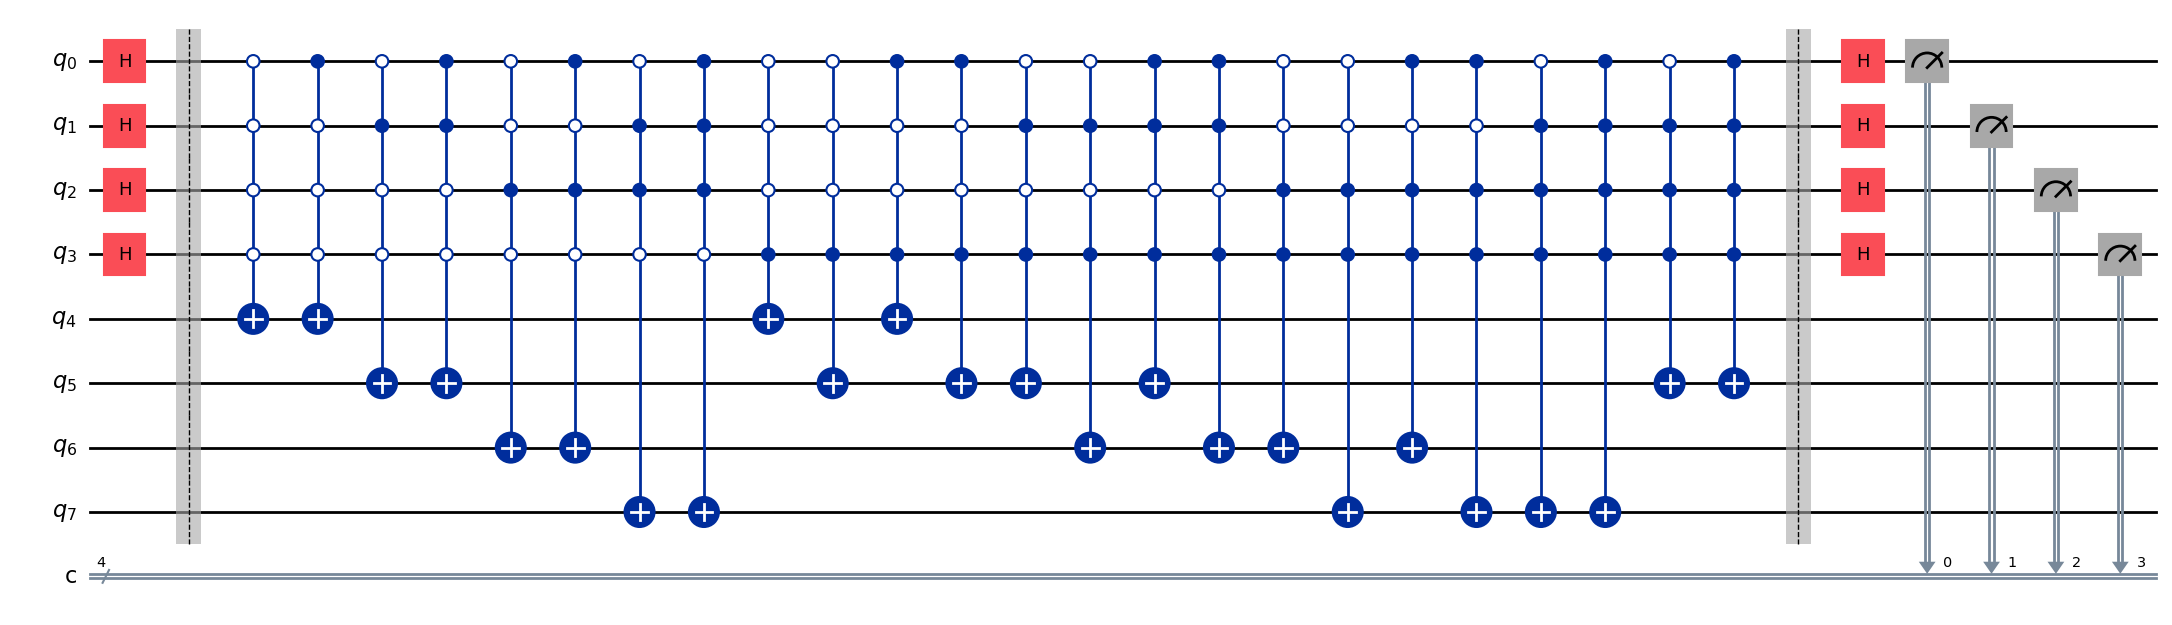

In [181]:
qc.draw('mpl', fold=-1)

In [180]:
# package version # 
import qiskit
import qiskit_ibm_runtime
import qiskit_aer
print(qiskit.__version__)
print(qiskit_ibm_runtime.__version__)
print(qiskit_aer.__version__)

2.0.0
0.38.0
0.17.0
